In [217]:
#import relevant libraries

import pandas as pd # pandas is used for data manipulation 
import matplotlib as mlp #matplotlib is used for visualization
import seaborn as sns # seaborn is used for data visualization

GHGRP = pd.ExcelFile("/Users/habeeb/Downloads/GHGRP flight_CA.xlsx",engine='openpyxl')
LMOP = pd.ExcelFile("/Users/habeeb/Downloads/lmopdata_CA.xlsx",engine='openpyxl')

#print the names of each sheets in the excel file
GHGRP.sheet_names

['2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010']

In [218]:
# to read just one sheet to dataframe i.e., GHHRP
GHGRP_2021 = pd.read_excel(GHGRP, sheet_name='2021', skiprows=range(0, 6))

In [219]:
GHGRP_2021.head()

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,GHG QUANTITY (METRIC TONS CO2e),SUBPARTS
0,2021,ALL PURPOSE LANDFILL,1004335,5401 Lafayette Street,37.413500,-121.972400,SANTA CLARA,SANTA CLARA COUNTY,CA,95050,CITY OF SANTA CLARA CA (100%),47082,HH
1,2021,ALLIED IMPERIAL LANDFILL,1006197,104 EAST ROBINSON ROAD,32.854673,-115.483038,IMPERIAL,IMPERIAL COUNTY,CA,92251,REPUBLIC SERVICES INC (100%),26326,HH
2,2021,AMERICAN AVENUE LANDFILL,1004417,18950 W AMERICAN AVENUE,36.665900,-120.138200,KERMAN,FRESNO COUNTY,CA,93630,COUNTY OF FRESNO (100%),110384,"C,HH"
3,2021,ANDERSON LANDFILL,1007839,18703 CAMBRIDGE ROAD,40.417540,-122.357870,ANDERSON,SHASTA COUNTY,CA,96007,WASTE MANAGEMENT INC (100%),37710,HH
4,2021,ANTELOPE VALLEY RECYCLING AND DISPOSAL FACILITY,1007710,1200 WEST CITY RANCH ROAD,34.569700,-118.153400,PALMDALE,LOS ANGELES COUNTY,CA,93551,WASTE MANAGEMENT INC (100%),51915,"C,HH"


In [220]:
#print the names of each sheets in the LMOP excel file
LMOP.sheet_names

['Summary', 'LMOP_Database', 'Field Descriptions']

In [221]:
# to read just one sheet to dataframe i.e., LMOP
LMOP_ = pd.read_excel(LMOP, sheet_name="LMOP_Database")

In [222]:
LMOP_.head()

,GHGRP ID,Landfill ID,Landfill Name,State,Physical Address,City,County,Zip Code,Latitude,Longitude,...,Project Start Date,Project Shutdown Date,Project Type Category,LFG Energy Project Type,RNG Delivery Method,Actual MW Generation,Rated MW Capacity,LFG Flow to Project (mmscfd),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided
0,NaN,36,Acme LF,CA,950 Waterbird Way,Martinez,Contra Costa,94553,38.03400,-122.09056,...,1999-01-01,NaT,Electricity,Cogeneration,NaN,1.90,NaN,NaN,0.08584,0.00984
1,NaN,36,Acme LF,CA,950 Waterbird Way,Martinez,Contra Costa,94553,38.03400,-122.09056,...,2003-08-01,NaT,Electricity,Microturbine,NaN,0.28,0.28,0.216,0.01265,0.00145
2,NaN,36,Acme LF,CA,950 Waterbird Way,Martinez,Contra Costa,94553,38.03400,-122.09056,...,1982-01-01,NaT,Direct,Boiler,NaN,NaN,NaN,1.500,0.13131,0.01297
3,NaN,37,Aerojet Liquid Rocket Company LF,CA,NaN,Rancho Cordova,Sacramento,95670,38.58333,-121.30000,...,NaT,NaT,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
4,1004335.0,349,All Purpose Landfill,CA,5401 Lafayette Street,Santa Clara,Santa Clara,95054,37.41639,-121.97056,...,2009-12-18,2013-12-31,Electricity,Microturbine,NaN,0.75,0.75,0.340,0.00000,0.00000


In [223]:
# Explore the data 

# This is a simple function which provides the missing value information, the rows and columns, unique values
# in the data frame, and the data type. 

# Self defined Exploration function
def Eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [224]:
Eda(LMOP_) # Explore the LMOP data

Dimensions : 410 rows, 33 columns
Total NA Values : 3617 
                           Column Name  Data Type      #Distinct  NA Values
                              GHGRP ID    float64          122        189
                           Landfill ID      int64          300          0
                         Landfill Name     object          300          0
                                 State     object            1          0
                      Physical Address     object          241         58
                                  City     object          259          0
                                County     object           55          0
                              Zip Code     object          246         21
                              Latitude    float64          281         18
                             Longitude    float64          282         18
                        Ownership Type     object            2          0
        Landfill Owner Organization(s)     object   

In [225]:
LMOP_.describe(include='object')

,Landfill Name,State,Physical Address,City,County,Zip Code,Ownership Type,Landfill Owner Organization(s),Current Landfill Status,LFG Collection System In Place?,Project ID,Current Project Status,Project Name,Project Type Category,LFG Energy Project Type,RNG Delivery Method
count,410,410,352,410,410,389,410,403,410,410,410,410,197,410,410,17
unique,300,1,241,259,55,246,2,145,3,4,404,8,39,4,14,3
top,Monterey Peninsula SLF,CA,5180 Convoy Street,San Diego,Los Angeles,91352,Public,"Republic Services, Inc.",Closed,Yes,200847-0,Low Potential,Project #1,Unknown,Unknown,Local Use
freq,8,410,8,12,62,9,299,29,232,269,3,147,83,219,219,8


In [226]:
Eda(GHGRP_2021) #explore the greenhouse gas data briefly

Dimensions : 127 rows, 13 columns
Total NA Values : 36 
                           Column Name  Data Type      #Distinct  NA Values
                        REPORTING YEAR      int64            1          0
                         FACILITY NAME     object          127          0
                              GHGRP ID      int64          127          0
                      REPORTED ADDRESS     object          123          3
                              LATITUDE    float64          126          0
                             LONGITUDE    float64          126          0
                             CITY NAME     object          121          0
                           COUNTY NAME     object           48          1
                                 STATE     object            1          0
                              ZIP CODE      int64          118          0
                      PARENT COMPANIES     object           70          2
       GHG QUANTITY (METRIC TONS CO2e)      int64     

In [227]:
GHGRP_2021.describe(include='object')

,FACILITY NAME,REPORTED ADDRESS,CITY NAME,COUNTY NAME,STATE,PARENT COMPANIES,SUBPARTS
count,127,124,127,126,127,125,97
unique,127,123,121,48,1,70,4
top,CITY OF LOMPOC SANITARY LANDFILL,5180 CONVOY STREET,SAN DIEGO,LOS ANGELES COUNTY,CA,WASTE MANAGEMENT INC (100%),HH
freq,1,2,3,17,127,14,72


In [228]:
# Merge the two files 
from functools import reduce

data_frames = [GHGRP_2021,LMOP_]

Merged = reduce(lambda  left,right: pd.merge(left,right,on=('GHGRP ID'),how='inner'), data_frames)

In [229]:
Merged.head()

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,...,Project Start Date,Project Shutdown Date,Project Type Category,LFG Energy Project Type,RNG Delivery Method,Actual MW Generation,Rated MW Capacity,LFG Flow to Project (mmscfd),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided
0,2021,ALL PURPOSE LANDFILL,1004335,5401 Lafayette Street,37.413500,-121.972400,SANTA CLARA,SANTA CLARA COUNTY,CA,95050,...,2009-12-18,2013-12-31,Electricity,Microturbine,NaN,0.75,0.75,0.34,0.00000,0.00000
1,2021,ALL PURPOSE LANDFILL,1004335,5401 Lafayette Street,37.413500,-121.972400,SANTA CLARA,SANTA CLARA COUNTY,CA,95050,...,2014-01-01,NaT,Electricity,Microturbine,NaN,0.40,NaN,0.24,0.01807,0.00207
2,2021,ALL PURPOSE LANDFILL,1004335,5401 Lafayette Street,37.413500,-121.972400,SANTA CLARA,SANTA CLARA COUNTY,CA,95050,...,1985-01-01,2005-11-01,Electricity,Reciprocating Engine,NaN,0.90,2.50,NaN,NaN,NaN
3,2021,ALLIED IMPERIAL LANDFILL,1006197,104 EAST ROBINSON ROAD,32.854673,-115.483038,IMPERIAL,IMPERIAL COUNTY,CA,92251,...,NaT,NaT,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,AMERICAN AVENUE LANDFILL,1004417,18950 W AMERICAN AVENUE,36.665900,-120.138200,KERMAN,FRESNO COUNTY,CA,93630,...,2023-12-31,NaT,Renewable Natural Gas,Other,Unknown,NaN,NaN,NaN,NaN,NaN


In [230]:
Eda(Merged)

Dimensions : 221 rows, 45 columns
Total NA Values : 1178 
                           Column Name  Data Type      #Distinct  NA Values
                        REPORTING YEAR      int64            1          0
                         FACILITY NAME     object          122          0
                              GHGRP ID      int64          122          0
                      REPORTED ADDRESS     object          118          5
                              LATITUDE    float64          121          0
                             LONGITUDE    float64          121          0
                             CITY NAME     object          117          0
                           COUNTY NAME     object           48          1
                                 STATE     object            1          0
                              ZIP CODE      int64          115          0
                      PARENT COMPANIES     object           65          2
       GHG QUANTITY (METRIC TONS CO2e)      int64   

In [231]:
Merged[['LATITUDE', 'LONGITUDE','Latitude', 'Longitude']]

,LATITUDE,LONGITUDE,Latitude,Longitude
0,37.413500,-121.972400,37.41639,-121.97056
1,37.413500,-121.972400,37.41639,-121.97056
2,37.413500,-121.972400,37.41639,-121.97056
3,32.854673,-115.483038,32.85800,-115.52600
4,36.665900,-120.138200,36.66171,-120.14570
...,...,...,...,...
216,37.966372,-122.392883,37.96778,-122.37639
217,37.966372,-122.392883,37.96778,-122.37639
218,37.966372,-122.392883,37.96778,-122.37639
219,36.149100,-119.228900,36.15056,-119.23139


In [232]:
#check duplicates in the dataset
# occurrence based on all columns
duplicate = Merged[Merged.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,...,Project Start Date,Project Shutdown Date,Project Type Category,LFG Energy Project Type,RNG Delivery Method,Actual MW Generation,Rated MW Capacity,LFG Flow to Project (mmscfd),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided


In [233]:
#remove duplicates in the data frame
Merged=Merged.drop_duplicates()

In [234]:
Eda(Merged)

Dimensions : 221 rows, 45 columns
Total NA Values : 1178 
                           Column Name  Data Type      #Distinct  NA Values
                        REPORTING YEAR      int64            1          0
                         FACILITY NAME     object          122          0
                              GHGRP ID      int64          122          0
                      REPORTED ADDRESS     object          118          5
                              LATITUDE    float64          121          0
                             LONGITUDE    float64          121          0
                             CITY NAME     object          117          0
                           COUNTY NAME     object           48          1
                                 STATE     object            1          0
                              ZIP CODE      int64          115          0
                      PARENT COMPANIES     object           65          2
       GHG QUANTITY (METRIC TONS CO2e)      int64   

In [235]:
# Add New Column from Existing Column, that is 50% of the GHG = Methane 

Merged = Merged.assign(Methane_emission=lambda x: x['GHG QUANTITY (METRIC TONS CO2e)'] / 2)

In [236]:
x=Merged[['GHG QUANTITY (METRIC TONS CO2e)','Methane_emission']]
x.head()

,GHG QUANTITY (METRIC TONS CO2e),Methane_emission
0,47082,23541.0
1,47082,23541.0
2,47082,23541.0
3,26326,13163.0
4,110384,55192.0


In [237]:
Merged.columns

Index(['REPORTING YEAR', 'FACILITY NAME', 'GHGRP ID', 'REPORTED ADDRESS',
       'LATITUDE', 'LONGITUDE', 'CITY NAME', 'COUNTY NAME', 'STATE',
       'ZIP CODE', 'PARENT COMPANIES', 'GHG QUANTITY (METRIC TONS CO2e)',
       'SUBPARTS', 'Landfill ID', 'Landfill Name', 'State', 'Physical Address',
       'City', 'County', 'Zip Code', 'Latitude', 'Longitude', 'Ownership Type',
       'Landfill Owner Organization(s)', 'Year Landfill Opened',
       'Landfill Closure Year', 'Current Landfill Status',
       'Waste in Place (tons)', 'Waste in Place Year',
       'LFG Collection System In Place?', 'LFG Collected (mmscfd)',
       'LFG Flared (mmscfd)', 'Project ID', 'Current Project Status',
       'Project Name', 'Project Start Date', 'Project Shutdown Date',
       'Project Type Category', 'LFG Energy Project Type',
       'RNG Delivery Method', 'Actual MW Generation', 'Rated MW Capacity',
       'LFG Flow to Project (mmscfd)',
       'Current Year Emission Reductions (MMTCO2e/yr) - Direct'

In [240]:
# çreate a column named Methane intensity using methane_emission/waste in place


Merged = Merged.assign(Methane_Intensity=lambda x: x['Methane_emission'] / x['Waste in Place (tons)'])

In [241]:
Merged.columns

Index(['REPORTING YEAR', 'FACILITY NAME', 'GHGRP ID', 'REPORTED ADDRESS',
       'LATITUDE', 'LONGITUDE', 'CITY NAME', 'COUNTY NAME', 'STATE',
       'ZIP CODE', 'PARENT COMPANIES', 'GHG QUANTITY (METRIC TONS CO2e)',
       'SUBPARTS', 'Landfill ID', 'Landfill Name', 'State', 'Physical Address',
       'City', 'County', 'Zip Code', 'Latitude', 'Longitude', 'Ownership Type',
       'Landfill Owner Organization(s)', 'Year Landfill Opened',
       'Landfill Closure Year', 'Current Landfill Status',
       'Waste in Place (tons)', 'Waste in Place Year',
       'LFG Collection System In Place?', 'LFG Collected (mmscfd)',
       'LFG Flared (mmscfd)', 'Project ID', 'Current Project Status',
       'Project Name', 'Project Start Date', 'Project Shutdown Date',
       'Project Type Category', 'LFG Energy Project Type',
       'RNG Delivery Method', 'Actual MW Generation', 'Rated MW Capacity',
       'LFG Flow to Project (mmscfd)',
       'Current Year Emission Reductions (MMTCO2e/yr) - Direct'

In [242]:
Merged['Methane_Intensity'].head()

0    0.004279
1    0.004279
2    0.004279
3    0.002608
4    0.003533
Name: Methane_Intensity, dtype: float64

In [244]:
Top10=Merged.sort_values(by=['Methane_Intensity'],ascending=False).head(10)

In [245]:
Merged.nlargest(n=10, columns=['Methane_Intensity'])

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,...,Project Type Category,LFG Energy Project Type,RNG Delivery Method,Actual MW Generation,Rated MW Capacity,LFG Flow to Project (mmscfd),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided,Methane_emission,Methane_Intensity
69,2021,Clover Flat Landfill,1013696,4380 Silverado Trail,38.576730,-122.53431,Calistoga,NAPA COUNTY,CA,94515,...,Electricity,Reciprocating Engine,NaN,0.750,NaN,0.35,0.03388,0.00389,28200.5,0.017429
91,2021,JOHNSON CANYON SANITARY LANDFILL,1007128,31400 JOHNSON CANYON ROAD,36.515520,-121.43420,GONZALES,MONTEREY COUNTY,CA,93926,...,Electricity,Reciprocating Engine,NaN,1.400,1.4,0.53,0.06325,0.00725,41146.5,0.011566
111,2021,Monterey Regional Waste Management District,1004550,14201 Del Monte Blvd,36.697498,-121.79350,Marina,MONTEREY COUNTY,CA,93933,...,Renewable Natural Gas,Vehicle Fuel,Local Use,NaN,NaN,NaN,0.00000,0.00000,132888.0,0.010182
112,2021,Monterey Regional Waste Management District,1004550,14201 Del Monte Blvd,36.697498,-121.79350,Marina,MONTEREY COUNTY,CA,93933,...,Electricity,Reciprocating Engine,NaN,1.200,NaN,NaN,0.00000,0.00000,132888.0,0.010182
113,2021,Monterey Regional Waste Management District,1004550,14201 Del Monte Blvd,36.697498,-121.79350,Marina,MONTEREY COUNTY,CA,93933,...,Electricity,Reciprocating Engine,NaN,0.800,0.8,NaN,0.00000,0.00000,132888.0,0.010182
114,2021,Monterey Regional Waste Management District,1004550,14201 Del Monte Blvd,36.697498,-121.79350,Marina,MONTEREY COUNTY,CA,93933,...,Electricity,Reciprocating Engine,NaN,0.987,NaN,NaN,0.00000,0.00000,132888.0,0.010182
115,2021,Monterey Regional Waste Management District,1004550,14201 Del Monte Blvd,36.697498,-121.79350,Marina,MONTEREY COUNTY,CA,93933,...,Electricity,Reciprocating Engine,NaN,0.987,NaN,NaN,0.04459,0.00511,132888.0,0.010182
116,2021,Monterey Regional Waste Management District,1004550,14201 Del Monte Blvd,36.697498,-121.79350,Marina,MONTEREY COUNTY,CA,93933,...,Electricity,Reciprocating Engine,NaN,1.057,NaN,NaN,0.04776,0.00548,132888.0,0.010182
117,2021,Monterey Regional Waste Management District,1004550,14201 Del Monte Blvd,36.697498,-121.79350,Marina,MONTEREY COUNTY,CA,93933,...,Electricity,Cogeneration,NaN,1.600,1.6,NaN,0.07229,0.00829,132888.0,0.010182
118,2021,Monterey Regional Waste Management District,1004550,14201 Del Monte Blvd,36.697498,-121.79350,Marina,MONTEREY COUNTY,CA,93933,...,Electricity,Reciprocating Engine,NaN,1.400,NaN,NaN,0.06325,0.00725,132888.0,0.010182


In [263]:
import plotly.express as px
fig = px.box(Top10,x='LFG Collection System In Place?',y='Waste in Place (tons)', color='Project Type Category')
fig.show()

In [254]:
import plotly.express as px
fig = px.bar(Top10, x='Methane_Intensity', y='CITY NAME')
fig.show()

In [264]:
import plotly.express as px
fig = px.box(Top10,x='Project Type Category',y='Waste in Place (tons)', color='RNG Delivery Method')
fig.show()

In [256]:
import plotly.express as px
fig = px.box(Top10,x='SUBPARTS',y='GHG QUANTITY (METRIC TONS CO2e)', color='Project Type Category')
fig.show()

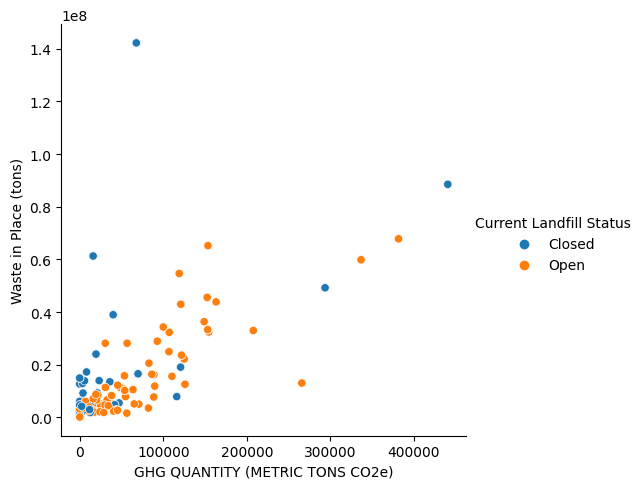

In [257]:
sns.relplot(x = 'GHG QUANTITY (METRIC TONS CO2e)', y = 'Waste in Place (tons)', hue='Current Landfill Status',data = Top10)

In [258]:
# Keep only relevant columns
df = Top10.loc[:, ("Methane_Intensity", "Landfill Name", "City", "Latitude", "Longitude")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 69 to 118
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Methane_Intensity  10 non-null     float64
 1   Landfill Name      10 non-null     object 
 2   City               10 non-null     object 
 3   Latitude           10 non-null     float64
 4   Longitude          10 non-null     float64
dtypes: float64(3), object(2)
memory usage: 480.0+ bytes


In [259]:
# Create point geometries
import geopandas
import folium

geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)
geo_df = geopandas.GeoDataFrame(
    df[["Methane_Intensity", "Landfill Name", "City", "Latitude", "Longitude"]], geometry=geometry
)

geo_df.head()

,Methane_Intensity,Landfill Name,City,Latitude,Longitude,geometry
69,0.017429,Clover Flat Landfill,Calistoga,38.58480,-122.53400,POINT (-122.53400 38.58480)
91,0.011566,Johnson Canyon SLF,Gonzales,36.53167,-121.40667,POINT (-121.40667 36.53167)
111,0.010182,Monterey Peninsula SLF,Marina,36.71333,-121.76667,POINT (-121.76667 36.71333)
116,0.010182,Monterey Peninsula SLF,Marina,36.71333,-121.76667,POINT (-121.76667 36.71333)
113,0.010182,Monterey Peninsula SLF,Marina,36.71333,-121.76667,POINT (-121.76667 36.71333)


In [260]:
lats_longs_weight = list(map(list, zip(geo_df["Latitude"],
                          geo_df["Longitude"],
                          geo_df["Methane_Intensity"]
                         )
               )
           )
lats_longs_weight[:5]

[[38.5848, -122.534, 0.017428716577011314],
 [36.53167, -121.40667, 0.011565968592421354],
 [36.71333, -121.76667, 0.010182086552332988],
 [36.71333, -121.76667, 0.010182086552332988],
 [36.71333, -121.76667, 0.010182086552332988]]

In [261]:
import folium

from folium.plugins import HeatMap


map_obj = folium.Map(location = [38.27312, -98.5821872], zoom_start = 4)

HeatMap(lats_longs_weight).add_to(map_obj)

map_obj

In [215]:
from folium import plugins
m = folium.Map([42 ,29], zoom_start=5,width="%100",height="%100")
locations = list(zip(geo_df["Latitude"], geo_df.Longitude))
cluster = plugins.MarkerCluster(locations=locations,                     
               popups=geo_df["Methane_Intensity"].tolist())  
m.add_child(cluster)
m

In [ ]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type of volcano, Strato being the most common
    if geo_df.['Current Landfill Status'][i] == "Stratovolcano":
        type_color = "green"
    elif geo_df.['Current Landfill Status'][i] == "Complex volcano":
        type_color = "blue"
    elif geo_df.Type[i] == "Shield volcano":
        type_color = "orange"
    elif geo_df.Type[i] == "Lava dome":
        type_color = "pink"
    else:
        type_color = "purple"

    # Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup=
                "Year: " + str(geo_df.Year[i]) + "<br>"
                + "Name: " + str(geo_df.Name[i]) + "<br>"
                + "Country: " + str(geo_df.Country[i]) + "<br>"
                + "Type: " + str(geo_df.Type[i]) + "<br>"
                + "Coordinates: " + str(geo_df_list[i]),
            icon=folium.Icon(color="%s" % type_color),
        )
    )
    i = i + 1

In [ ]:
import folium

m = world.explore(
     column="pop_est",  # make choropleth based on "BoroName" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, # show legend
     k=10, # use 10 bins
     legend_kwds=dict(colorbar=False), # do not use colorbar
     name="countries" # name of the layer in the map
)

cities.explore(
     m=m, # pass the map object
     color="red", # use red color on all points
     marker_kwds=dict(radius=10, fill=True), # make marker radius 10px with fill
     tooltip="name", # show "name" column in the tooltip
     tooltip_kwds=dict(labels=False), # do not show column label in the tooltip
     name="cities" # name of the layer in the map
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map

In [ ]:
nybb.explore(
     column="BoroName", # make choropleth based on "BoroName" column
     tooltip="BoroName", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") # use black outline
    )